<a href="https://colab.research.google.com/github/Dubeyanshu/EDA-Submission-/blob/main/ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Bike Sharing Demand Prediction

**Project Type** - Regression                           
**Contribution** - Individual                                
**Team Member** - Ayush Dubey



# **Project Summary** - 

# **Github Link** - 

# **Problem Statement**

Currently Rental Bikes are introduced in many urban cities for the enhancement of mobility comfort.it is important to make the rental biked available ans accesible to the public at the right time as it lessens the waiting time.Eventually,providing the city with a stable supply of rental bikes becomes a major concern.The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 

# **Let's Begin** !

## **1.Know Your Data**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import datetime as dt


### Dataset Loading

In [ ]:
df = pd.read_csv('/content/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows and Columns Count

In [ ]:
df.shape

(8760, 14)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **2.Understanding Your Variables**

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

### Check Unique Values for each variable

In [ ]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## **3.Data Wrangling**

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Date'] = df['Date'].apply(lambda x : dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
df.drop('Date',axis=1,inplace=True)

# **Data Visulization, Storytelling & Experimenting with Charts :Understand the relationships between variables**

### Chart - 1

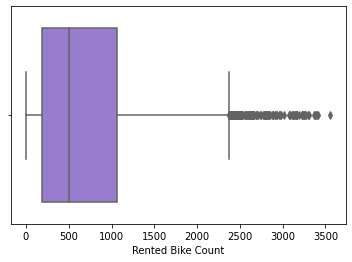

In [ ]:
sns.boxplot(x='Rented Bike Count',data=df,color='mediumpurple')
plt.show()

### Chart - 2

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


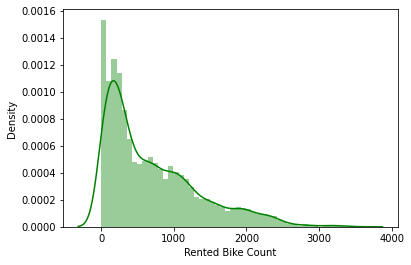

In [ ]:
sns.distplot(df['Rented Bike Count'],bins=50,color='green')
plt.show()


### Chart - 3

Text(0, 0.5, 'Counts')

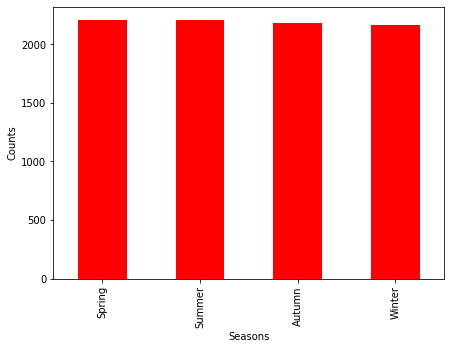

In [ ]:
Count_season = df['Seasons'].value_counts()
Count_season.plot.bar(figsize=(7,5),color='red')
plt.xlabel('Seasons')
plt.ylabel('Counts')

### Chart - 4

Text(0.5, 1.0, 'Counting number of Holidaya and non-Holidays Seasonwise')

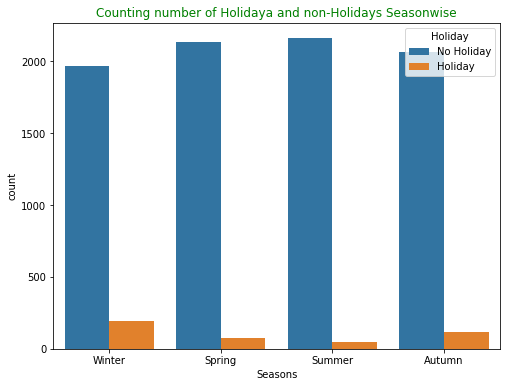

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Seasons',hue='Holiday',data=df)
plt.ioff()
plt.title('Counting number of Holidaya and non-Holidays Seasonwise',color='green')

### Chart - 5

Text(0.5, 1.0, 'Counting number of Functioning Day Seasonwise')

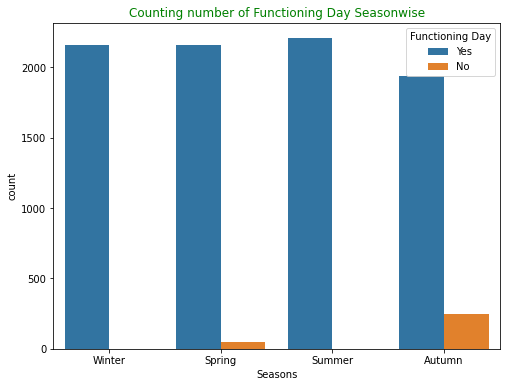

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Seasons',data=df,hue='Functioning Day')
plt.ioff()
plt.title('Counting number of Functioning Day Seasonwise',color='green')


### Chart - 6

Text(0.5, 1.0, 'Count of Rented bikes according to month')

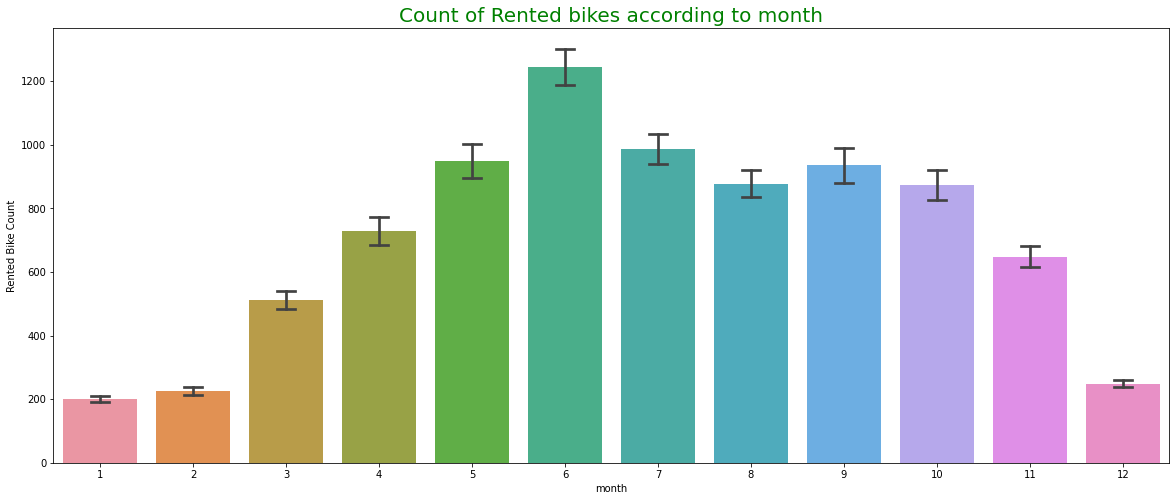

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='Rented Bike Count',data=df,ax=ax,capsize=0.2)
ax.set_title('Count of Rented bikes according to month',fontsize=20,color='green')

### Chart - 7

Text(0.5, 1.0, 'Count of rented bikes according to hour')

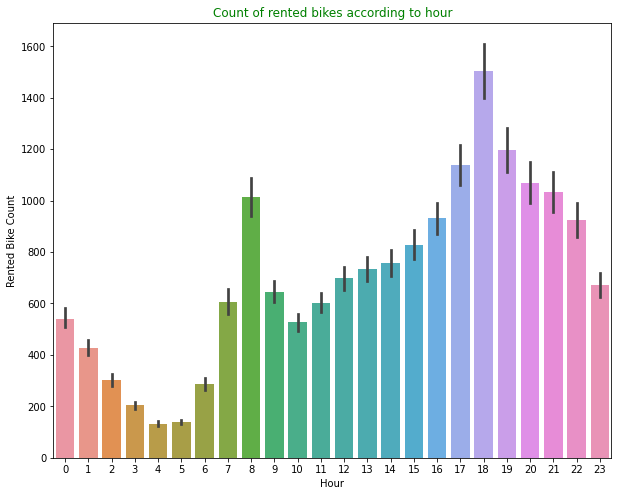

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)
plt.title('Count of rented bikes according to hour',color='green')

### Chart - 8

Text(0.5, 1.0, 'Count of rented bikes according to seasons')

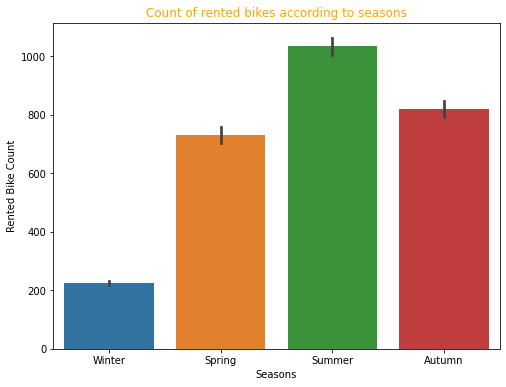

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)
plt.title('Count of rented bikes according to seasons',color='orange')


### Chart - 9

Text(0.5, 1.0, 'Count of Rented bikes according to Holiday')

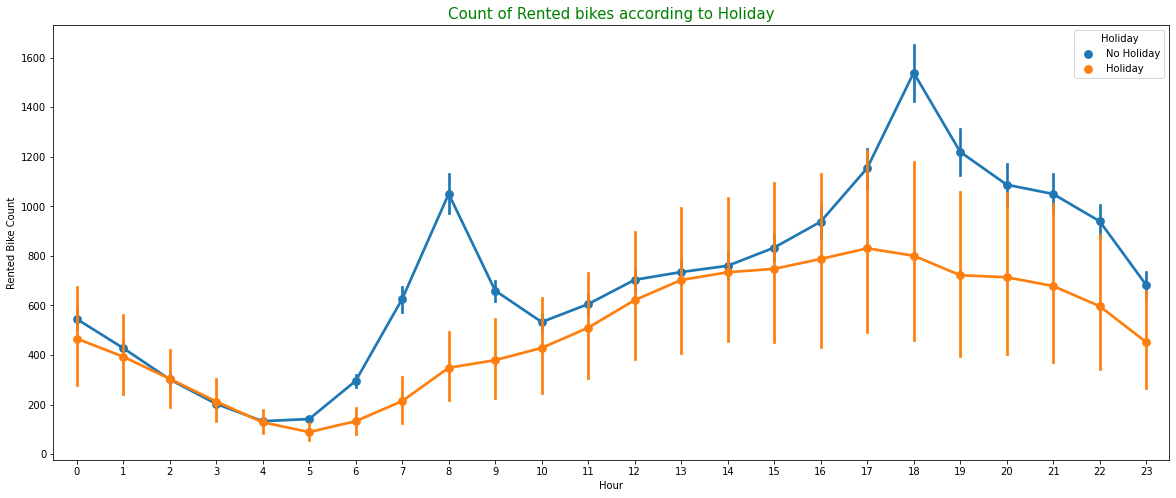

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Holiday',data=df,ax=ax)
plt.ioff()
ax.set_title('Count of Rented bikes according to Holiday',color='green',fontsize=15)

### Chart - 10

In [ ]:
s

# **Feature Enginerring and Data Pre-Processing**

In [ ]:
numerical_columns = list(df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year',
       'month'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

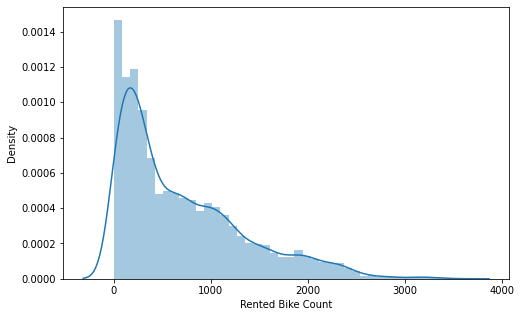

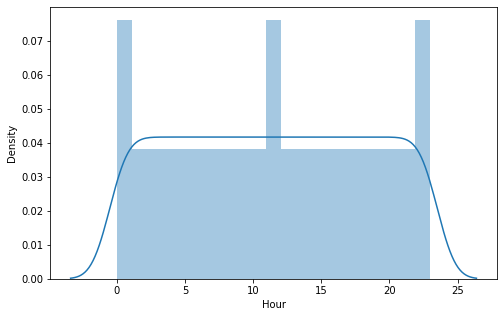

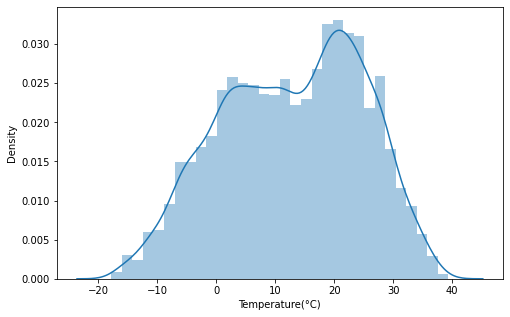

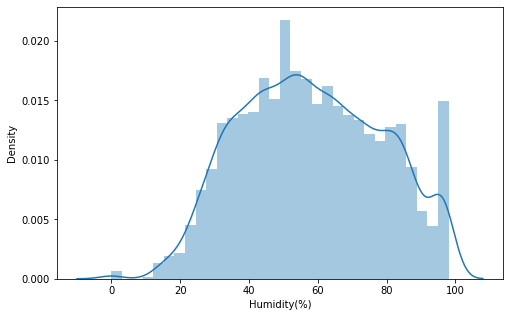

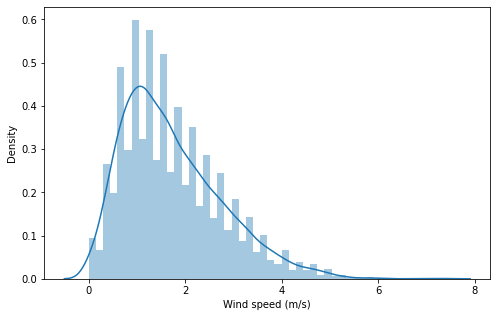

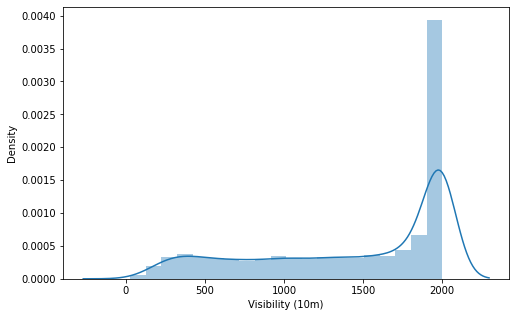

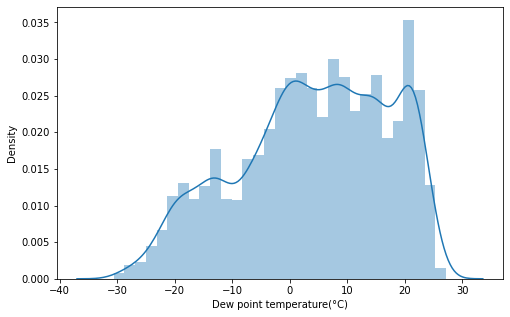

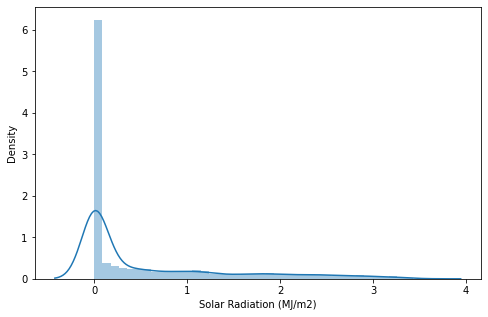

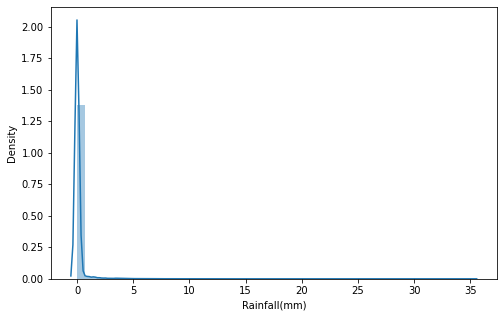

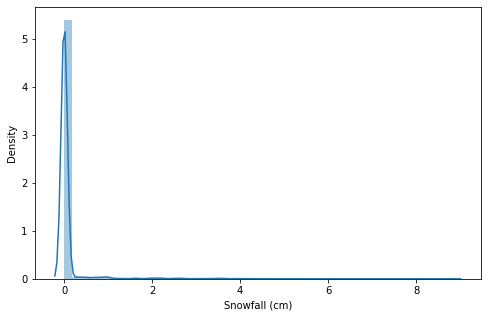

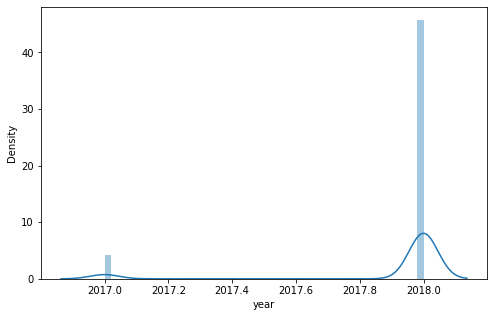

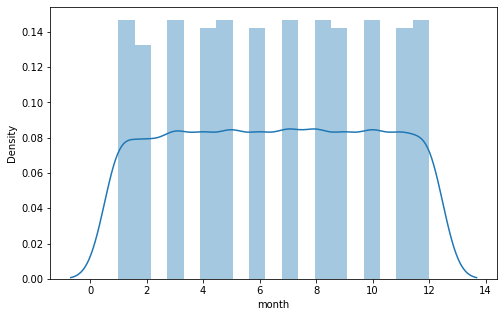

In [ ]:
for col in numerical_features:
  plt.figure(figsize=(8,5))
  sns.distplot(df[col])
  plt.xlabel(col)
plt.show()  


### Regression Plot

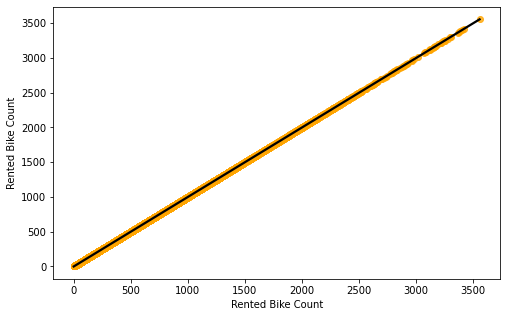

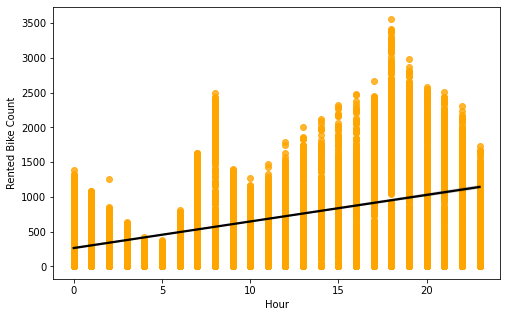

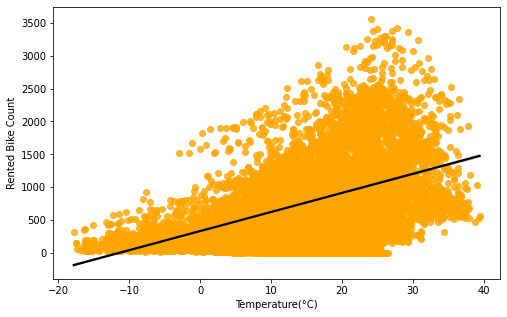

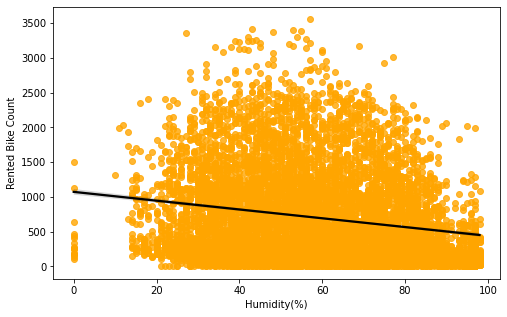

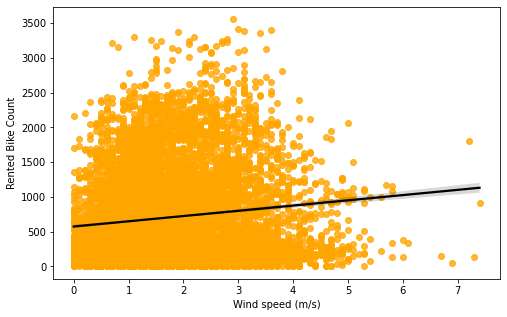

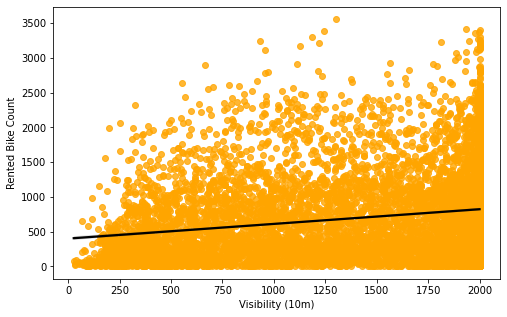

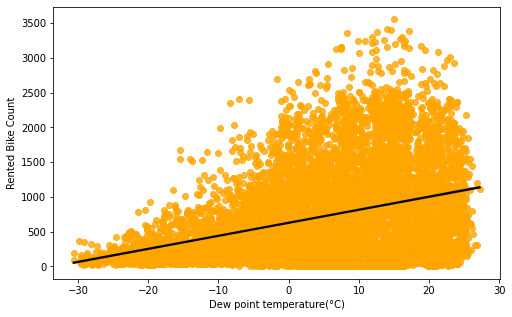

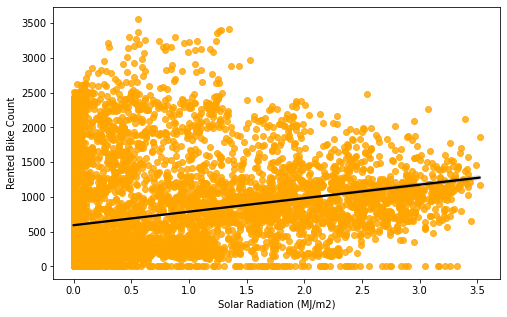

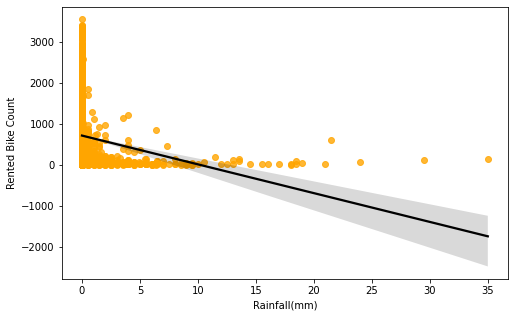

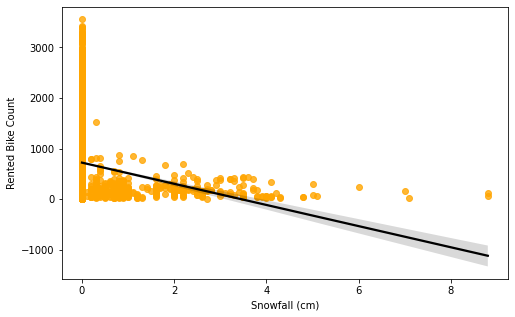

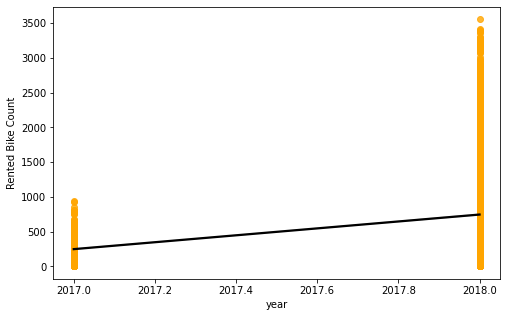

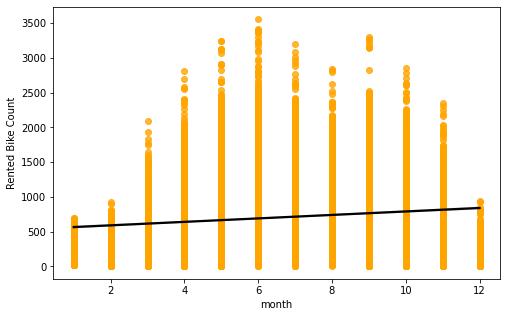

In [ ]:
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(8,5))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color":"orange"},line_kws={"color":"black"})


### Data pre-processing

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


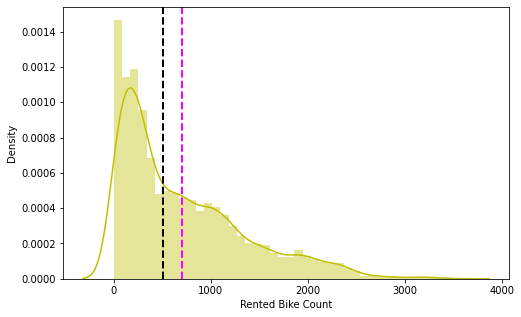

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True,color='y')
ax.axvline(df['Rented Bike Count'].mean(),color='magenta',linestyle='dashed',linewidth=2)
ax.axvline(df['Rented Bike Count'].median(),color='black',linestyle='dashed',linewidth=2)
plt.show()


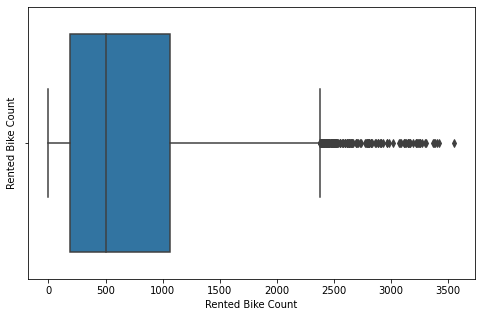

In [ ]:
plt.figure(figsize=(8,5))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


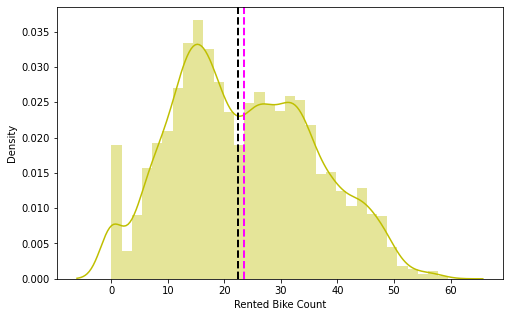

In [ ]:
#apply square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['Rented Bike Count']),color='y') 
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(),color='magenta',linestyle='dashed',linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(),color='black',linestyle='dashed',linewidth=2)


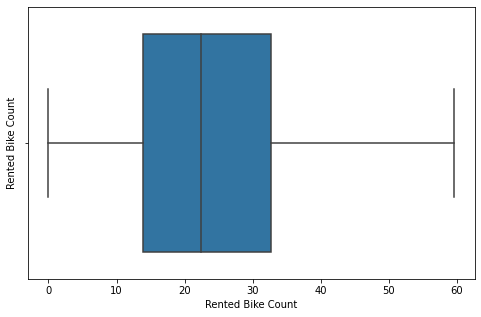

In [ ]:
plt.figure(figsize=(8,5))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

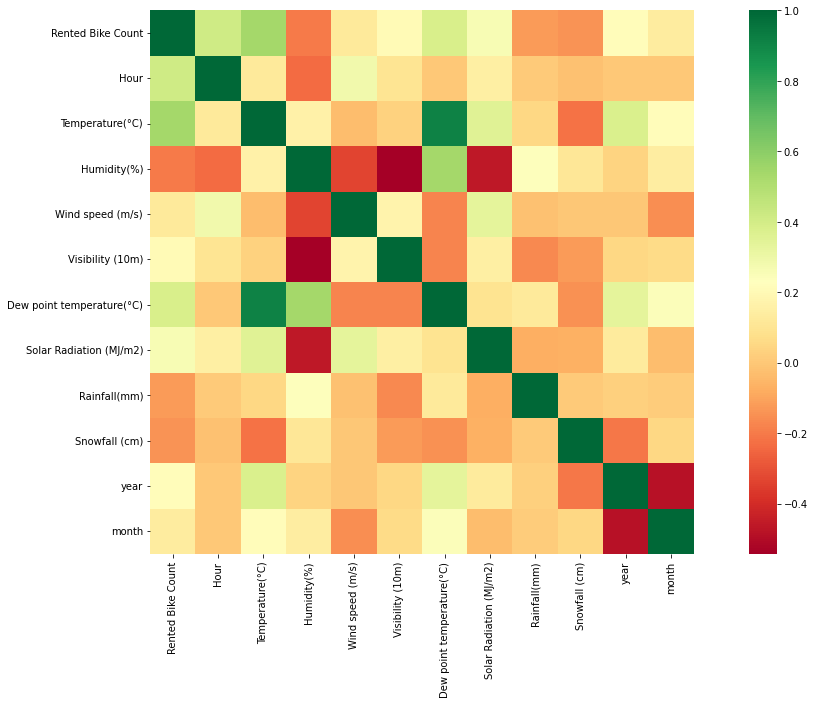

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='RdYlGn',square=True)
plt.ioff()

In [ ]:
#drop the dew point temperature columns
df.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  year                     8760 non-null   int64  
 13  month                    8760 non-null   int64  
 14  day                     

### Create dummy Variables

In [ ]:
categorical_features = list(df.select_dtypes(['object','category']).columns)
categorical_features = pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'day'], dtype='object')

In [ ]:
#coding to convert the categorical features to numerical features
Coded_data = pd.get_dummies(df,columns=['Seasons', 'Holiday', 'Functioning Day', 'day'])
Coded_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,...,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,...,1,0,1,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,...,1,0,1,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,...,1,0,1,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,...,1,0,1,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,2018,...,1,0,1,1,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,2018,...,1,0,1,1,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,2018,...,1,0,1,1,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,2018,...,1,0,1,1,0,0,0,0,0,0


### Model Training

Train Test split for regression

In [ ]:
# Assign the value in x and y
X = Coded_data.drop(columns=['Rented Bike Count'],axis=1)
y = np.sqrt(df['Rented Bike Count']) 

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,...,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,...,1,0,1,1,0,0,0,0,0,0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,...,1,0,1,1,0,0,0,0,0,0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,...,1,0,1,1,0,0,0,0,0,0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,...,1,0,1,1,0,0,0,0,0,0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,...,1,0,1,1,0,0,0,0,0,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#create train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape) 

(6570, 25)
(2190, 25)


In [ ]:
#import regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)



In [ ]:
#Check the score
reg.score(X_train,y_train)

0.657729073673267

In [ ]:
#Check the coefficients
reg.coef_

array([ 4.86888775e-01,  4.91124707e-01, -1.65412195e-01,  5.85817857e-02,
        1.22445852e-04, -9.09714050e-01, -1.45537750e+00,  2.06947236e-02,
       -8.53251309e+00, -5.90223612e-01,  6.24130113e+00, -1.81140343e-01,
        1.34761379e+00, -7.40777458e+00, -1.54920884e+00,  1.54920884e+00,
       -1.44149539e+01,  1.44149539e+01,  9.13878727e-01, -3.25555627e-01,
       -2.74904223e-01, -1.94943584e+00,  3.62098552e-01,  6.03019648e-01,
        6.70898763e-01])

In [ ]:
#get the X_train and X_test values
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr = mean_squared_error((y_train),(y_pred_train))
print('MSE :',MSE_lr)

#calculate RMSE
RMSE = np.sqrt(MSE_lr)
print('RMSE :',RMSE)

#calculate MAE
MAE_lr = mean_absolute_error(y_train,y_pred_train)
print('MAE :',MAE_lr) 

#calculate r2 and adjusted r2
from sklearn.metrics import r2_score
r2_lr = r2_score(y_train,y_pred_train)
print('r2 :',r2_lr)


MSE : 52.70653227815103
RMSE : 7.259926465064989
MAE : 5.575301609395135
r2 : 0.657729073673267


### Lasso Regression

In [ ]:
#create an instance of lasso regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0,max_iter=3000)
#fit the model
lasso.fit(X_train,y_train)
#create the model score
print(lasso.score(X_test,y_test),lasso.score(X_train,y_train))


0.45182594627157147 0.475318258860282


In [ ]:
#get the x_train and x_test value
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)


In [ ]:
#calculate MSE
MSE_M = mean_squared_error((y_train),(y_pred_train_lasso))
print('MSE :',MSE_M)

#calculate RMSE
RMSE_M = np.sqrt(MSE_M)
print('RMSE :',RMSE_M)

#calculate MAE
MAE_M = mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE :',MAE_M)

#calculate r2 
r2_r = r2_score(y_train,y_pred_train_lasso)
print('r2 :',r2_r)


MSE : 80.79609747144657
RMSE : 8.98866494377483
MAE : 6.675898765429622
r2 : 0.475318258860282


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)


In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train,y_train)

0.6577289928621779

In [ ]:
y_pred_train_ridge = ridge.predict(X_train)
y_predict_test_ridge = ridge.predict(X_test)

In [ ]:
#import the package
from sklearn.metrics import mean_squared_error

#Calculate MSE
MSE_M = mean_squared_error(y_train,y_pred_train_ridge)
print('MSE :',MSE_M)

#Calculate RMSE
RMSE_M = np.sqrt(MSE_M)
print('RMSE :',RMSE_M)

#Calculate MAE
MAE_M = mean_absolute_error(y_train,y_pred_train_ridge)
print('MAE :',MAE_M)

#Calculate r2
r2_r = r2_score(y_train,y_pred_train_ridge)
print('r2 :',r2_r)


MSE : 52.7065447223055
RMSE : 7.259927322109052
MAE : 5.575258213809421
r2 : 0.6577289928621779
